# Import libraries

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn import preprocessing
from sklearn import linear_model
%matplotlib inline
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

# Read the data set

In [125]:
df=pd.read_csv('C:\\Users\Admin\\Documents\\Europe Hotel Booking Satisfaction Score.csv')
df

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,neutral or dissatisfied
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,neutral or dissatisfied
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,satisfied
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,neutral or dissatisfied
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,satisfied
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,3,2,neutral or dissatisfied
103900,73097,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,5,4,satisfied
103901,68825,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,5,4,neutral or dissatisfied
103902,54173,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,4,1,neutral or dissatisfied


# Checking for missing value

In [126]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
purpose_of_travel                 0
Type of Travel                    0
Type Of Booking                   0
Hotel wifi service                0
Departure/Arrival  convenience    0
Ease of Online booking            0
Hotel location                    0
Food and drink                    0
Stay comfort                      0
Common Room entertainment         0
Checkin/Checkout service          0
Other service                     0
Cleanliness                       0
satisfaction                      0
dtype: int64

# Data Understanding

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103904 entries, 0 to 103903
Data columns (total 17 columns):
 #   Column                          Non-Null Count   Dtype 
---  ------                          --------------   ----- 
 0   id                              103904 non-null  int64 
 1   Gender                          103904 non-null  object
 2   Age                             103904 non-null  int64 
 3   purpose_of_travel               103904 non-null  object
 4   Type of Travel                  103904 non-null  object
 5   Type Of Booking                 103904 non-null  object
 6   Hotel wifi service              103904 non-null  int64 
 7   Departure/Arrival  convenience  103904 non-null  int64 
 8   Ease of Online booking          103904 non-null  int64 
 9   Hotel location                  103904 non-null  int64 
 10  Food and drink                  103904 non-null  int64 
 11  Stay comfort                    103904 non-null  int64 
 12  Common Room entertainment     

# Return description of the data in the DataFrame

In [60]:
df.describe()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
count,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000,103904.000000
mean,64924.210502,39.379706,2.729683,3.060296,2.756901,2.976883,3.202129,3.439396,3.358158,3.304290,3.640428,3.286351
std,37463.812252,15.114964,1.327829,1.525075,1.398929,1.277621,1.329533,1.319088,1.332991,1.265396,1.175663,1.312273
min,1.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32533.750000,27.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,3.000000,3.000000,2.000000
50%,64856.500000,40.000000,3.000000,3.000000,3.000000,3.000000,3.000000,4.000000,4.000000,3.000000,4.000000,3.000000
75%,97368.250000,51.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000
max,129880.000000,85.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


# Drop the columns

In [74]:
x=df.drop(columns='satisfaction')
x

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
103899,94171,Female,23,business,Group Travel,Individual/Couple,2,1,2,3,2,2,2,2,3,2
103900,73097,Male,49,tourism,Group Travel,Group bookings,4,4,4,4,2,5,5,5,5,4
103901,68825,Male,30,tourism,Group Travel,Group bookings,1,1,1,3,4,5,4,5,5,4
103902,54173,Female,22,business,Group Travel,Individual/Couple,1,1,1,5,1,1,1,5,4,1


In [79]:
y=df['satisfaction']
y


0         0
1         0
2         1
3         0
4         1
         ..
103899    0
103900    1
103901    0
103902    0
103903    0
Name: satisfaction, Length: 103904, dtype: int32

In [130]:
# preprocessing
label_encoder=preprocessing.LabelEncoder()
df['satisfaction']=label_encoder.fit_transform(df['satisfaction'])
df['satisfaction'].unique()

array([0, 1], dtype=int64)

In [70]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train)
x_test_scaled=scaler.transform(x_test)
x_train_scaled

array([[-1.35516392, -0.48762544,  0.20583551, ..., -0.95570955,
         1.10412804, -0.27854662],
       [-0.54839366,  0.57130873, -0.54733019, ...,  1.046343  ,
        -0.90569206, -0.27854662],
       [ 0.55301803, -0.55380882,  0.20583551, ..., -0.95570955,
        -0.90569206,  3.59006333],
       ...,
       [-0.18947944, -0.28907528, -0.54733019, ..., -0.95570955,
        -0.90569206,  3.59006333],
       [ 0.49069208,  2.15970998, -1.30049589, ...,  1.046343  ,
        -0.90569206, -0.27854662],
       [-0.79500384, -1.21564268,  0.95900122, ..., -0.95570955,
         1.10412804, -0.27854662]])

In [ ]:
# create linear logisticregression object
from sklearn.linear_model import LogisticRegression
log_reg=LogisticRegression(random_state=0).fit(x_train_scaled,y_train)
log_reg.predict(x_train_scaled)

In [89]:
log_reg.score(x_train_scaled,y_train)

0.8437375936864646

In [106]:
log_reg.score(x_test_scaled,y_test)

0.8431259323420432

# EDA

<Axes: xlabel='Type Of Booking', ylabel='count'>

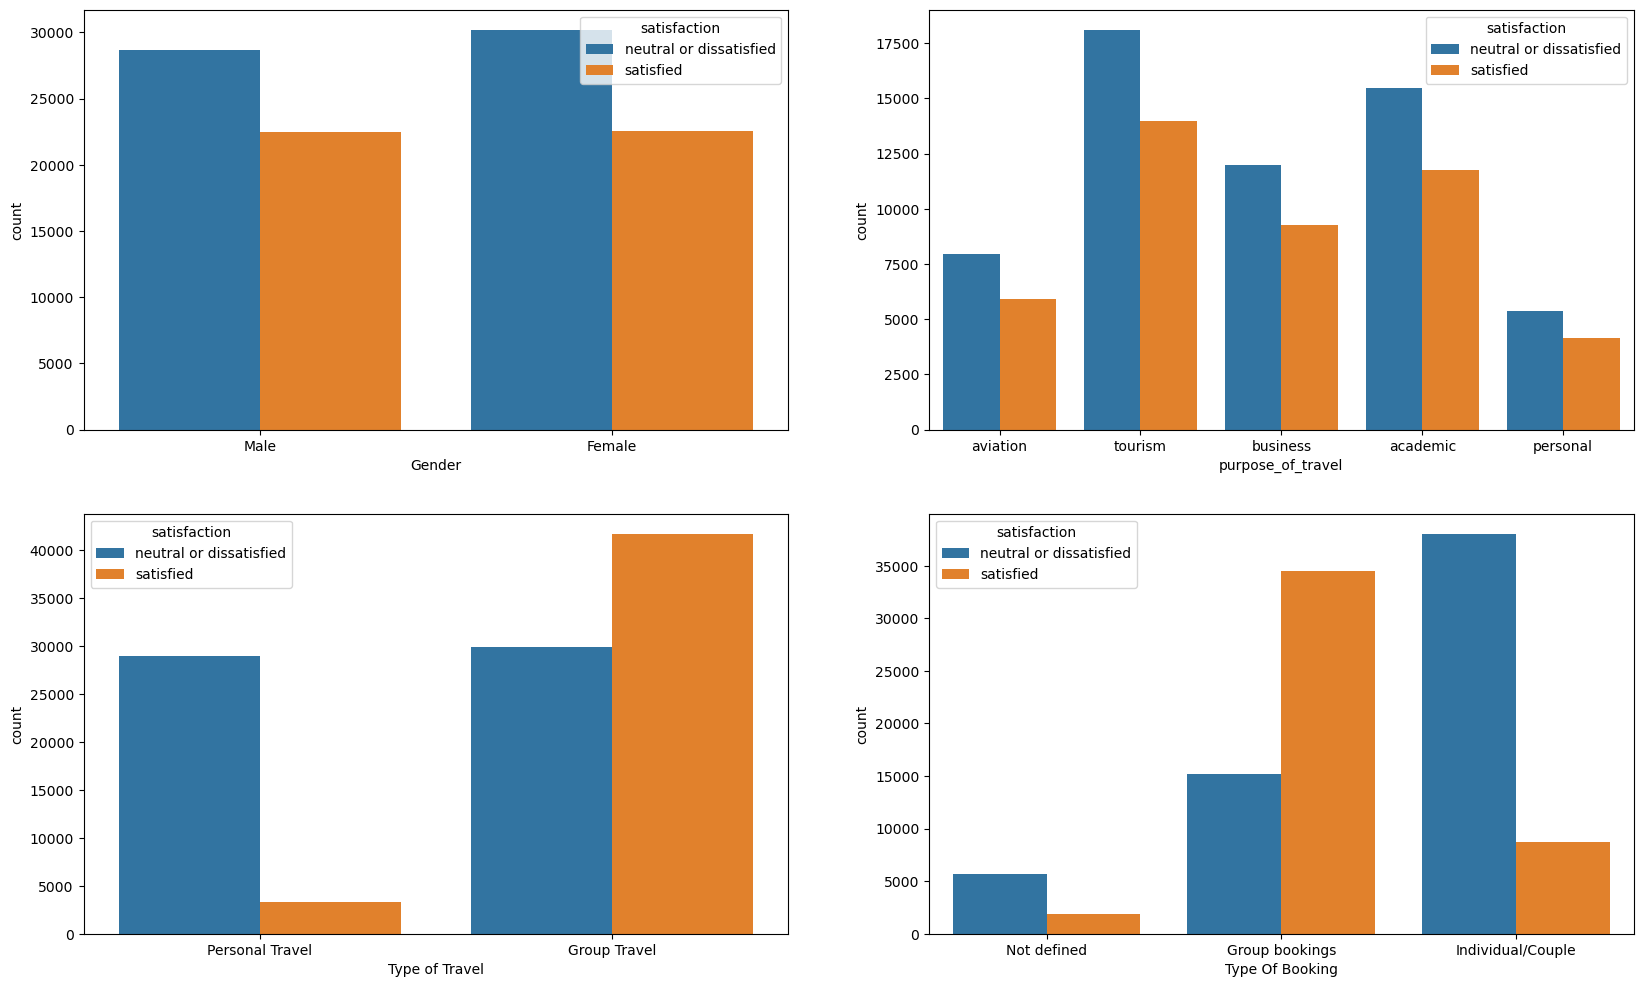

In [107]:
fig, axarr = plt.subplots(2,2, figsize=(20,12))
sns.countplot(x='Gender', hue='satisfaction', data=df, ax=axarr[0][0])
sns.countplot(x='purpose_of_travel', hue='satisfaction', data=df, ax=axarr[0][1])
sns.countplot(x='Type of Travel', hue='satisfaction', data=df, ax=axarr[1][0])
sns.countplot(x='Type Of Booking', hue='satisfaction', data=df, ax=axarr[1][1])

<Axes: xlabel='satisfaction', ylabel='Stay comfort'>

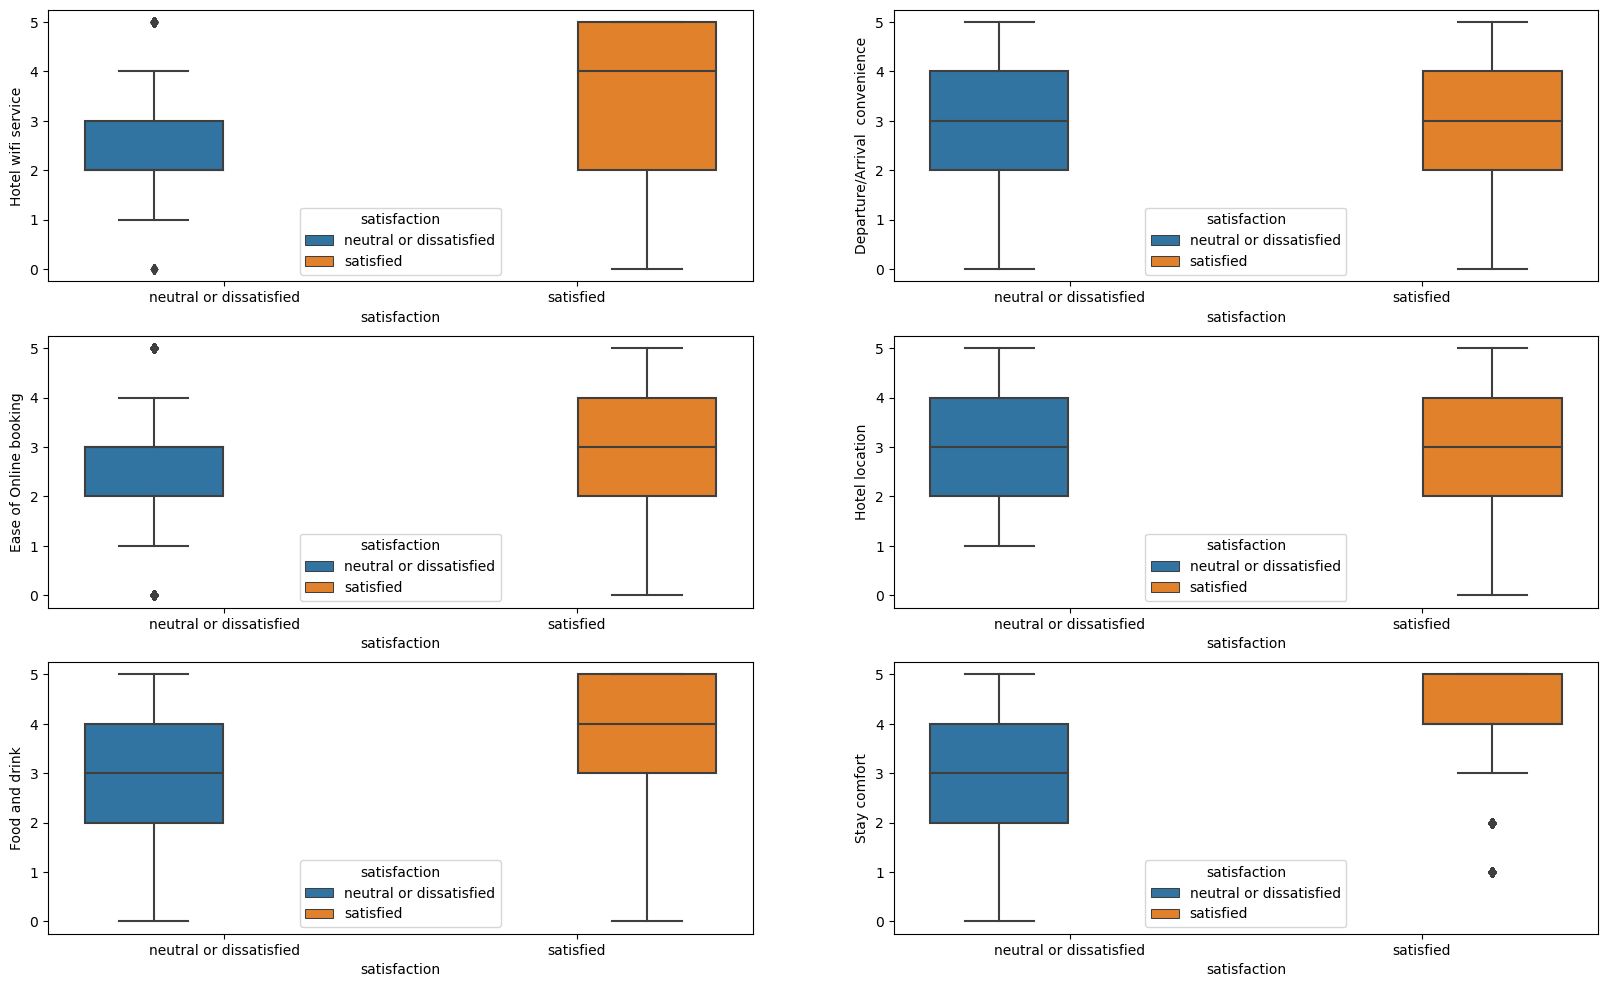

In [108]:
fig, axarr = plt.subplots(3,2, figsize=(20,12))
sns.boxplot(y='Hotel wifi service', x='satisfaction', hue='satisfaction', data=df, ax=axarr[0][0])
sns.boxplot(y='Departure/Arrival  convenience', x='satisfaction', data=df, hue='satisfaction', ax=axarr[0][1])
sns.boxplot(y='Ease of Online booking', x='satisfaction', data=df, hue='satisfaction', ax=axarr[1][0])
sns.boxplot(y='Hotel location', x='satisfaction', data=df, hue='satisfaction', ax=axarr[1][1])
sns.boxplot(y='Food and drink', x='satisfaction', hue='satisfaction', data=df, ax=axarr[2][0])
sns.boxplot(y='Stay comfort', x='satisfaction', hue='satisfaction', data=df, ax=axarr[2][1])

<Axes: xlabel='satisfaction', ylabel='Cleanliness'>

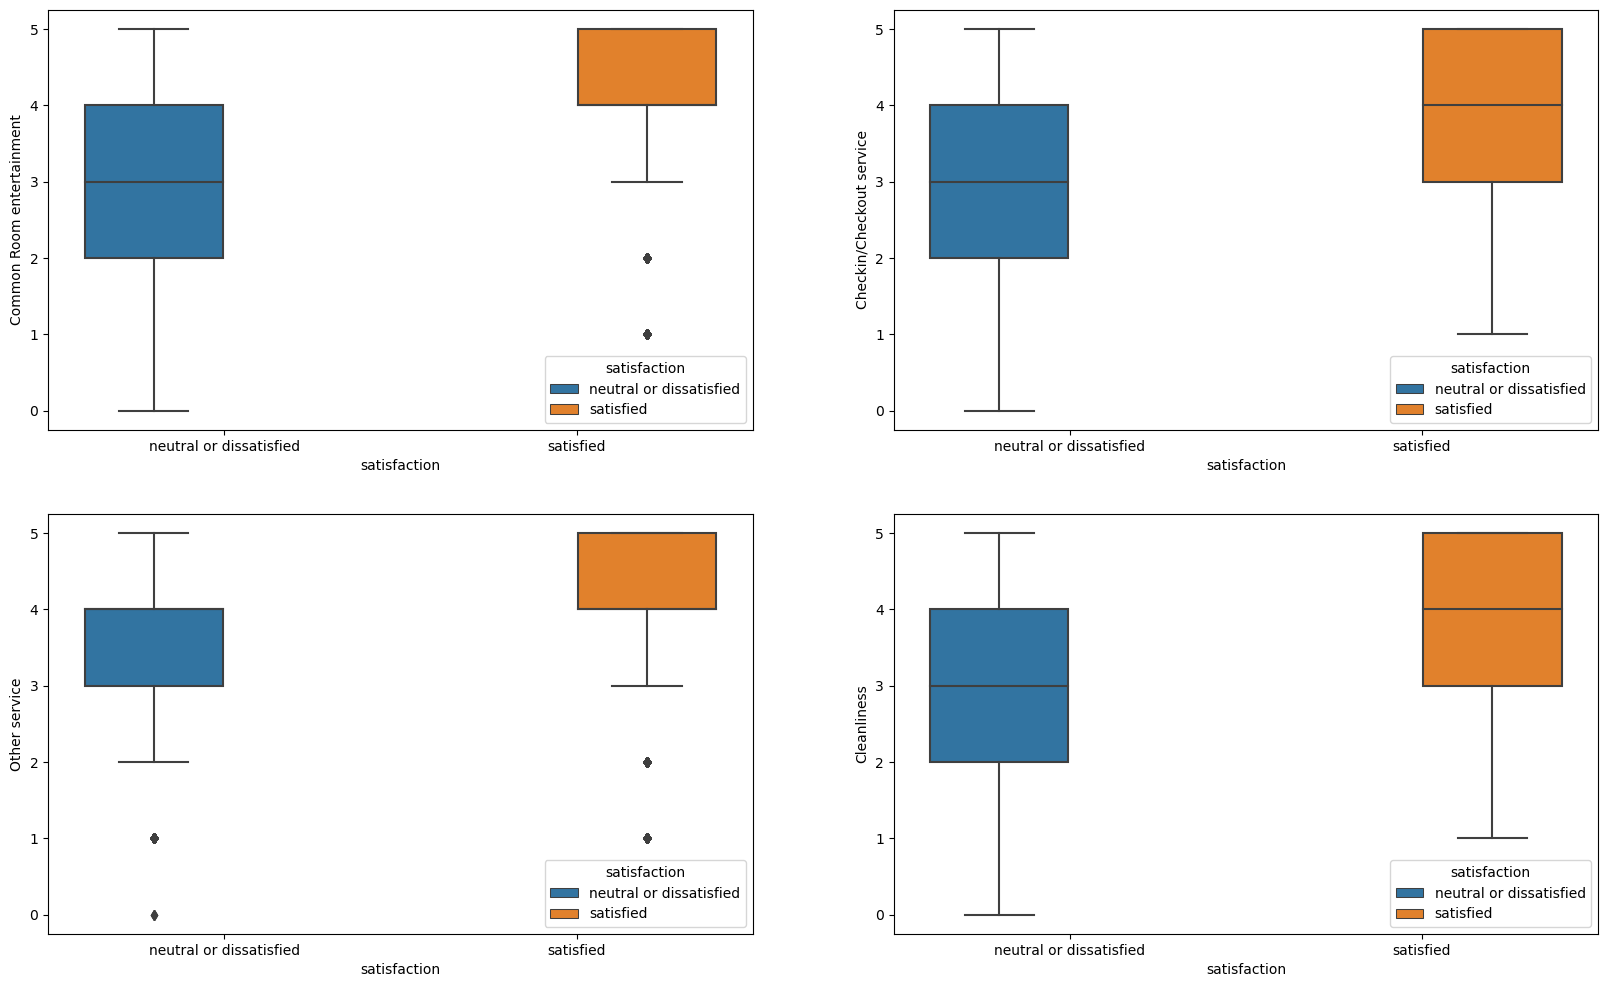

In [109]:
fig, axarr = plt.subplots(2,2, figsize=(20,12))
sns.boxplot(y='Common Room entertainment', x='satisfaction', data=df, hue='satisfaction', ax=axarr[0][0])
sns.boxplot(y='Checkin/Checkout service', x='satisfaction', data=df, hue='satisfaction', ax=axarr[0][1])
sns.boxplot(y='Other service', x='satisfaction', hue='satisfaction', data=df, ax=axarr[1][0])
sns.boxplot(y='Cleanliness', x='satisfaction', hue='satisfaction', data=df, ax=axarr[1][1])

<Axes: xlabel='satisfaction', ylabel='count'>

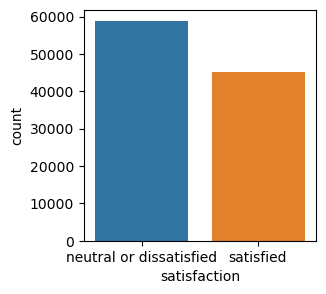

In [110]:
fig, axarr = plt.subplots(figsize=(3,3))
sns.countplot(data=df, x='satisfaction')

<Axes: >

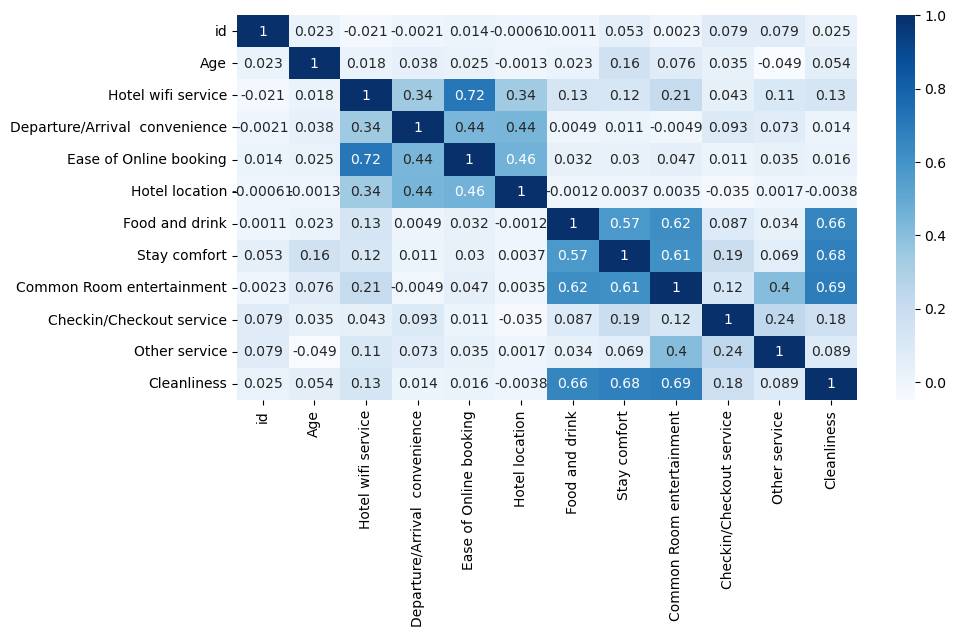

In [112]:
cm = df.corr()
plt.figure(figsize=(10,5))
sns.heatmap(cm, annot=True, cmap='Blues')

# Feature engineering

In [ ]:
# print the first 5 rows
df.head()

In [114]:
df.replace({'satisfaction':{'satisfied':0, 'neutral or dissatisfied':1}}, inplace=True)
df.head()

,id,Gender,Age,purpose_of_travel,Type of Travel,Type Of Booking,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,Other service,Cleanliness,satisfaction
0,70172,Male,13,aviation,Personal Travel,Not defined,3,4,3,1,5,5,5,4,5,5,1
1,5047,Male,25,tourism,Group Travel,Group bookings,3,2,3,3,1,1,1,1,4,1,1
2,110028,Female,26,tourism,Group Travel,Group bookings,2,2,2,2,5,5,5,4,4,5,0
3,24026,Female,25,tourism,Group Travel,Group bookings,2,5,5,5,2,2,2,1,4,2,1
4,119299,Male,61,aviation,Group Travel,Group bookings,3,3,3,3,4,5,3,3,3,3,0


In [115]:
df1 = pd.get_dummies(df)
df1.head()

,id,Age,Hotel wifi service,Departure/Arrival convenience,Ease of Online booking,Hotel location,Food and drink,Stay comfort,Common Room entertainment,Checkin/Checkout service,...,purpose_of_travel_academic,purpose_of_travel_aviation,purpose_of_travel_business,purpose_of_travel_personal,purpose_of_travel_tourism,Type of Travel_Group Travel,Type of Travel_Personal Travel,Type Of Booking_Group bookings,Type Of Booking_Individual/Couple,Type Of Booking_Not defined
0,70172,13,3,4,3,1,5,5,5,4,...,0,1,0,0,0,0,1,0,0,1
1,5047,25,3,2,3,3,1,1,1,1,...,0,0,0,0,1,1,0,1,0,0
2,110028,26,2,2,2,2,5,5,5,4,...,0,0,0,0,1,1,0,1,0,0
3,24026,25,2,5,5,5,2,2,2,1,...,0,0,0,0,1,1,0,1,0,0
4,119299,61,3,3,3,3,4,5,3,3,...,0,1,0,0,0,1,0,1,0,0


# Deleting the entire column

In [127]:
df1.columns

Index(['id', 'Age', 'Hotel wifi service', 'Departure/Arrival  convenience',
       'Ease of Online booking', 'Hotel location', 'Food and drink',
       'Stay comfort', 'Common Room entertainment', 'Checkin/Checkout service',
       'Other service', 'Cleanliness', 'satisfaction', 'Gender_Female',
       'Gender_Male', 'purpose_of_travel_academic',
       'purpose_of_travel_aviation', 'purpose_of_travel_business',
       'purpose_of_travel_personal', 'purpose_of_travel_tourism',
       'Type of Travel_Group Travel', 'Type of Travel_Personal Travel',
       'Type Of Booking_Group bookings', 'Type Of Booking_Individual/Couple',
       'Type Of Booking_Not defined'],
      dtype='object')

# Feature Importance

<BarContainer object of 24 artists>

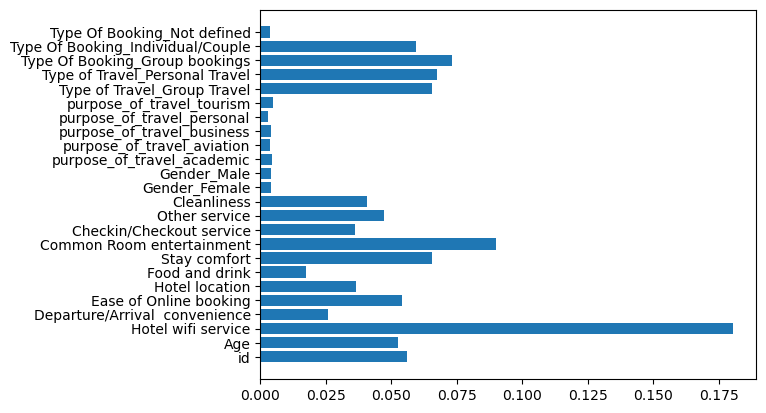

In [124]:
fi = model.feature_importances_
col = x_train.columns
plt.barh(col,fi)

In [128]:
# split the data set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(df_encoded,y,test_size=0.15,random_state=100)

In [118]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,f1_score
model=DecisionTreeClassifier()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
Accuracy=classification_report(y_test,y_pred)

In [119]:
Accuracy=classification_report(y_test,y_pred)
print(Accuracy)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8851
           1       0.91      0.91      0.91      6735

    accuracy                           0.92     15586
   macro avg       0.92      0.92      0.92     15586
weighted avg       0.92      0.92      0.92     15586



In [120]:
train_score=model.score(x_train,y_train)
print("train_score",train_score)
train_score=model.score(x_test,y_test)
print("train_score",train_score)

train_score 1.0
train_score 0.9234569485435647


In [121]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,f1_score
model=RandomForestClassifier()
model.fit(x_train,y_train)
Accuracy=classification_report(y_test,y_pred)

In [122]:
Accuracy=classification_report(y_test,y_pred)
print(Accuracy)

              precision    recall  f1-score   support

           0       0.93      0.93      0.93      8851
           1       0.91      0.91      0.91      6735

    accuracy                           0.92     15586
   macro avg       0.92      0.92      0.92     15586
weighted avg       0.92      0.92      0.92     15586



In [123]:
train_score=model.score(x_train,y_train)
print("train_score",train_score)
train_score=model.score(x_test,y_test)
print("train_score",train_score)

train_score 1.0
train_score 0.9522006929295521
